# Derivation of non-centered D3DX3 scheme without using ghost points

The non-centre version is used when the processors is at the outer x boundary, calculating for second last point. The following scheme is 2nd order convergent.

We are here calculating for the second last point.

In [1]:
from IPython.display import display
from sympy import init_printing
from sympy import symbols, together, as_finite_diff, simplify
from sympy import Function, Eq, S

init_printing()

In [12]:
x = symbols('x')
h = symbols('h', positive=True)

f = Function('f')

# Stencils
stencil = [x-2*h, x-h, x, x+h, x+h*3/2]

We are here discretizing the equation

$$ \partial_\rho^3 f$$

### Calculate the finite difference approximation of $\partial_x^3 f$

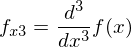

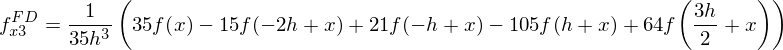

In [14]:
fx3 = f(x).diff(x,3)
fx3FD = as_finite_diff(fx3, stencil)
display(Eq(symbols('f_x3'), fx3))
display(Eq(symbols('f^FD_x3'), together(fx3FD)))

# Calculating the order

Let's call the Taylor expansions of $f$ for $T[f(x,a)] = \sum_{n=0}^\infty\frac{f^{(n)}(a)}{n!}(x-a)^n$

In [4]:
x0 = symbols('x0')
terms = 7

Taylor expasion of $f$ expanded around $a=x_0$ evaluated in $x=x+\frac{3h}{2}$

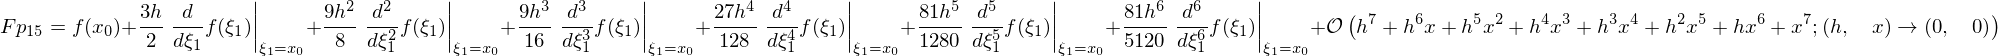

In [5]:
Fp15 = f(x+h*3/2).series(x+h*3/2, x0=x0, n=terms)
Fp15 = Fp15.subs(x-x0,0)
display(Eq(symbols('Fp15'),Fp15))

Taylor expasion of $f$ expanded around $a=x_0$ evaluated in $x=x+h$

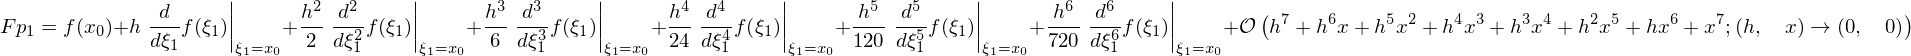

In [6]:
Fp1 = f(x+h).series(x+h, x0=x0, n=terms)
Fp1 = Fp1.subs(x-x0,0)
display(Eq(symbols('Fp1'),Fp1))

Taylor expasion of $f$ expanded around $a=x_0$ evaluated in $x=x$

In [7]:
F = f(x).series(x, x0=x0, n=terms)
F = F.subs(x-x0,0)
display(Eq(symbols('F'),F))

Taylor expasion of $f$ expanded around $a=x_0$ evaluated in $x=x-h$

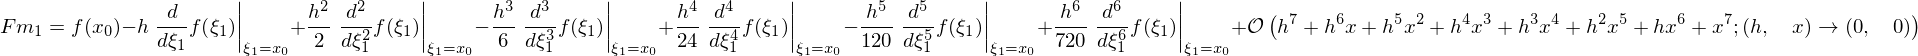

In [8]:
Fm1 = f(x-h).series(x-h, x0=x0, n=terms)
Fm1 = Fm1.subs(x-x0,0)
display(Eq(symbols('Fm1'),Fm1))

Taylor expasion of $f$ expanded around $a=x_0$ evaluated in $x=x-2h$

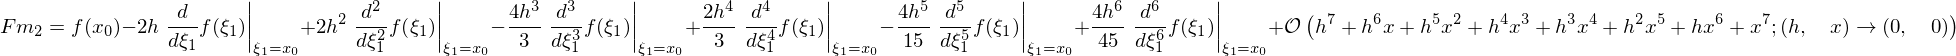

In [9]:
Fm2 = f(x-2*h).series(x-2*h, x0=x0, n=terms)
Fm2 = Fm2.subs(x-x0,0)
display(Eq(symbols('Fm2'),Fm2))

Substitute into the FD scheme

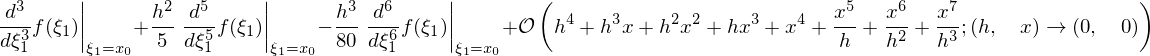

In [11]:
fx3FDT = fx3FD.subs([(f(x+h*3/2), Fp15),
                     (f(x+h)    , Fp1 ),
                     (f(x)      , F   ),
                     (f(x-h)    , Fm1 ),
                     (f(x-2*h)  , Fm2 ),              
                    ])
display(simplify(fx3FDT))

Thus, we see that this discretization is 2nd order accurate.